In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv('car_dataset.csv')
df

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe()

,ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
null_counts=df.isnull().sum()
null_counts

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
duplicates=df.duplicated().sum()
duplicates

np.int64(0)

In [9]:
x=df['horsepower']
y=df['price']

In [10]:
x

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: int64

In [11]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [12]:
print(df[['horsepower','price']])

     horsepower    price
0           111  13495.0
1           111  16500.0
2           154  16500.0
3           102  13950.0
4           115  17450.0
..          ...      ...
200         114  16845.0
201         160  19045.0
202         134  21485.0
203         106  22470.0
204         114  22625.0

[205 rows x 2 columns]


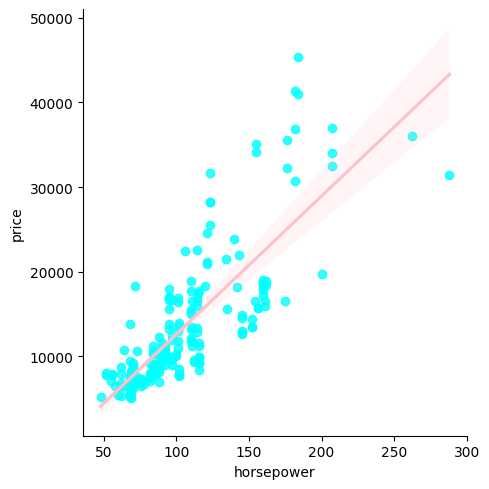

In [13]:
sns.lmplot(x='horsepower',y='price',data=df,scatter_kws={'color': 'cyan'},line_kws={'color': 'pink'})
plt.show()

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
x_train.size

164

In [16]:
x_test.size

41

In [17]:
y_train.size

164

In [18]:
y_test.size

41

In [19]:
reg=linear_model.LinearRegression()
reg.fit(df[['horsepower']],df['price'])

LinearRegression()

In [20]:
reg.predict([[111]])

C:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14400.43827331])

In [21]:
y_pred=reg.predict(x_test.values.reshape(-1,1))
y_pred

C:\Users\krish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 9665.80950519,  7543.38971258, 11788.22929779,  7706.65277355,
        5257.70685901,  7380.12665161, 16359.59500494,  9665.80950519,
        7380.12665161, 22400.32826082, 11788.22929779,  7706.65277355,
       14563.70133428, 16359.59500494, 28930.85069961, 19951.38234628,
        6400.5482858 ,  9992.33562713,  7706.65277355, 10971.91399295,
       19135.06704143, 25012.53723634, 11788.22929779,  9665.80950519,
        4114.86543222, 12931.07072458, 11298.44011488,  6400.5482858 ,
        9665.80950519, 10155.5986881 , 30073.69212639, 19951.38234628,
        7380.12665161,  7380.12665161, 25012.53723634,  6400.5482858 ,
        7543.38971258,  7706.65277355, 10318.86174907, 10318.86174907,
       12931.07072458])

In [22]:
# Create a DataFrame
dff = pd.DataFrame({
    'Horsepower': x_test.values.flatten(),
    'Actual Price': y_test.values.flatten(),
    'Predicted Price': y_pred.flatten()
})

# Display the DataFrame
print(dff)


    Horsepower  Actual Price  Predicted Price
0           82        8013.0      9665.809505
1           69        6849.0      7543.389713
2           95       15580.0     11788.229298
3           70        7198.0      7706.652774
4           55        7099.0      5257.706859
5           68        6692.0      7380.126652
6          123       31600.0     16359.595005
7           82        7463.0      9665.809505
8           68        6377.0      7380.126652
9          160       18399.0     22400.328261
10          95       13860.0     11788.229298
11          70        8358.0      7706.652774
12         112        9298.0     14563.701334
13         123       28176.0     16359.595005
14         200       19699.0     28930.850700
15         145       14869.0     19951.382346
16          62        6488.0      6400.548286
17          84       10595.0      9992.335627
18          70        8916.5      7706.652774
19          90        9295.0     10971.913993
20         140       23875.0     1